<a href="https://colab.research.google.com/github/aymnblh/AI/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
data=pd.read_csv("/content/CC GENERAL.csv",sep = ',')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.drop('CUST_ID',
  axis='columns', inplace=True)

In [ ]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

In [ ]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


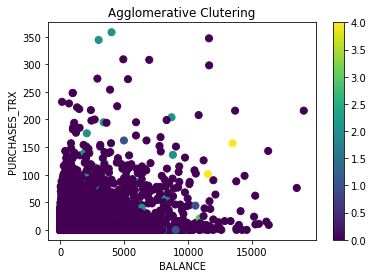

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES_TRX"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES_TRX")
plt.colorbar(scatter)

Dendogram

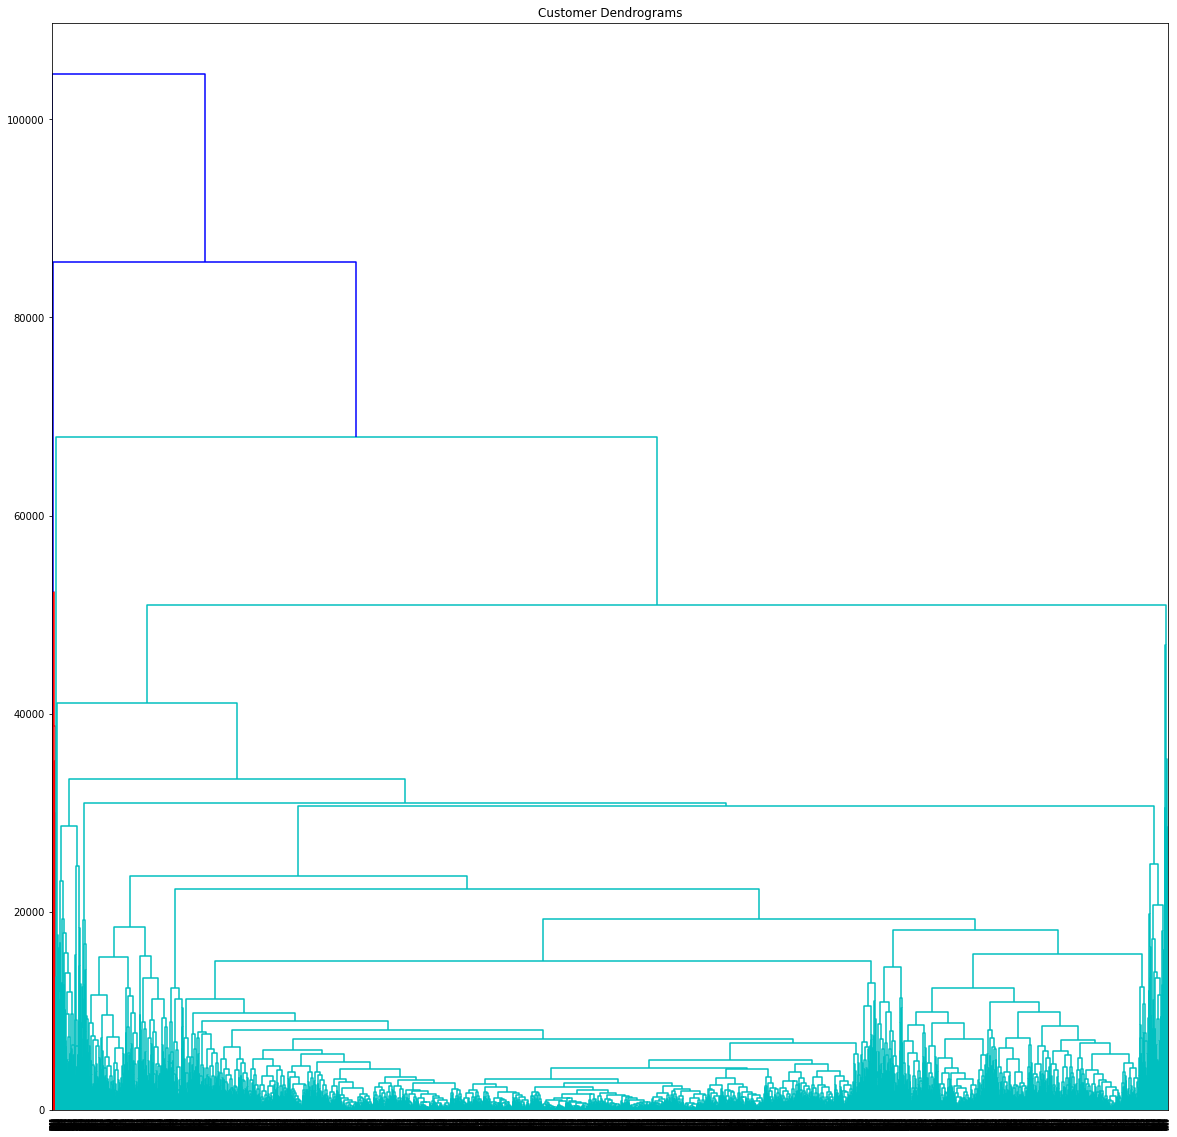

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,20))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

K-means

K-best value

In [ ]:
from sklearn.cluster import KMeans
sum_sd=[]
k = range(1,15)
for i in k:
   km = KMeans(n_clusters=i)
   km = km.fit(data)
   sum_sd.append(km.inertia_)

[393063223604.9707,
 279294461405.6078,
 232803450659.2276,
 206820394459.7907,
 181602928896.02005,
 161686913988.3706,
 145206257827.18082,
 132870951775.31346,
 124175185242.48164,
 117556834983.90741,
 109197203874.12222,
 102867394407.96254,
 98111911219.25093,
 94415695502.76799]

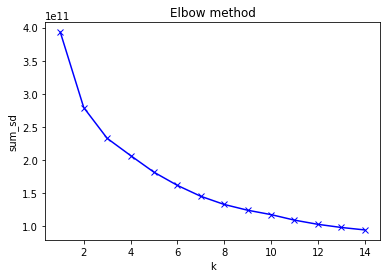

In [ ]:
plt.plot(k,sum_sd,'bx-')
plt.xlabel('k')
plt.ylabel('sum_sd')
plt.title("Elbow method")
plt.show()

K = 3

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [ ]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[8.55547772e+02 8.54392278e-01 6.05511215e+02 3.13658240e+02
  2.92151440e+02 4.94642068e+02 4.67946082e-01 1.54282435e-01
  3.52624521e-01 1.06674705e-01 2.25118701e+00 1.06890795e+01
  2.75020272e+03 9.98522851e+02 5.85584658e+02 1.56988214e-01
  1.14336039e+01]
 [3.40009680e+03 9.40635707e-01 1.58193616e+03 9.88569367e+02
  5.93679437e+02 2.11849375e+03 5.39530575e-01 3.17320221e-01
  3.84669335e-01 2.11111162e-01 5.75414847e+00 2.21209607e+01
  9.01078801e+03 2.89169090e+03 1.56513504e+03 1.34124700e-01
  1.17375546e+01]
 [4.80882923e+03 9.09847656e-01 1.07073796e+04 7.56195397e+03
  3.14559359e+03 5.19105119e+03 7.47270397e-01 5.95595015e-01
  5.99510939e-01 2.26083061e-01 9.17557252e+00 8.55496183e+01
  1.24660305e+04 1.80939666e+04 2.49776397e+03 3.33011382e-01
  1.18396947e+01]]


K = 2

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [ ]:
kmeans.predict(data)
print(kmeans.cluster_centers_) 

[[3.83174174e+03 9.39821048e-01 2.36499888e+03 1.55149934e+03
  8.13882690e+02 2.59214186e+03 5.57655055e-01 3.45877762e-01
  4.05814518e-01 2.27473224e-01 6.57892004e+00 2.80046729e+01
  9.81438450e+03 4.29529635e+03 1.76439840e+03 1.49536909e-01
  1.17383178e+01]
 [9.42784043e+02 8.60119256e-01 6.29797184e+02 3.29459957e+02
  3.00614658e+02 5.36507864e+02 4.71895469e-01 1.63131506e-01
  3.53091607e-01 1.09827330e-01 2.33570615e+00 1.10643508e+01
  3.03549595e+03 1.03059463e+03 6.17371474e+02 1.54860196e-01
  1.14567198e+01]]


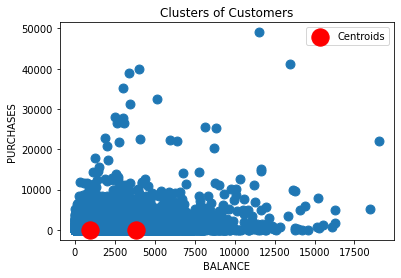

In [ ]:
from sklearn.cluster import KMeans
plt.scatter(data["BALANCE"],data["PURCHASES"],s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()